# Multilevel modelling

To examine changes in life satisfaction over time, in response to greenspace and private garden availability

In [2]:
pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numba
import seaborn as sns 
import matplotlib.pyplot as plt
#import geopandas as gpd
#import palettable as pltt
#import descartes
import pysal
from pysal.viz import mapclassify 
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import statistics
import matplotlib

In [3]:
US = pd.read_csv('US_stackedwaves2.csv')

/var/folders/2b/jhzv8k1922d7vy7v96lt10600000gn/T/ipykernel_27309/2599543862.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  US = pd.read_csv('US_stackedwaves2.csv')


In [4]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22380 entries, 0 to 22379
Data columns (total 93 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pidp               22380 non-null  int64  
 1   psu                22380 non-null  int64  
 2   strata             22380 non-null  int64  
 3   Park_Area          22380 non-null  float64
 4   Park_Prop          22380 non-null  float64
 5   Nat_Area           22380 non-null  float64
 6   Nat_Prop           22380 non-null  float64
 7   Sports_Are         22380 non-null  float64
 8   Sports_Pro         22380 non-null  float64
 9   Other_Area         22380 non-null  float64
 10  Other_Prop         22380 non-null  float64
 11  Total_Area         22380 non-null  float64
 12  Total_Prop         22380 non-null  float64
 13  garden             22380 non-null  int64  
 14  age1524            22380 non-null  int64  
 15  age2534            22380 non-null  int64  
 16  age3544            223

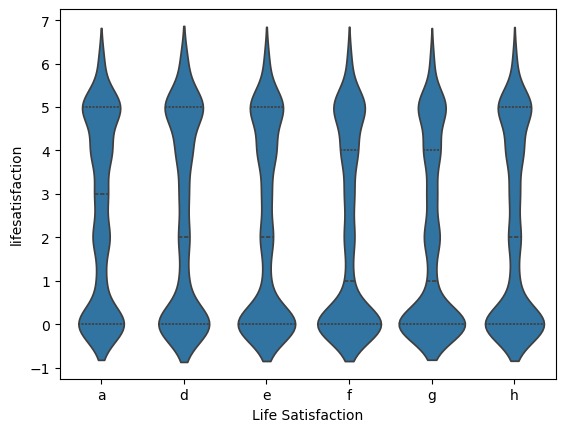

In [5]:
fig = sns.violinplot(data = US, x = "Time", y = "lifesatisfaction", inner = 'quartile')
plt.xlabel("Life Satisfaction") 

plt.show()

## Cross Tabs

In [6]:
sub = US[['lifesatisfaction', 'garden', 'Park_Prop', 'Nat_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome', 'income_q1','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank'
        ]]
corr = sub.corr()
corr.style.background_gradient(cmap='coolwarm')

,lifesatisfaction,garden,Park_Prop,Nat_Prop,age2534,age3544,age4554,age5564,age65,male,partner,Race_WhiteOth,Race_Mixed,Race_Black,Race_SthAsian,Race_OthAsian,Race_Other,employed,ownhome,income_q1,income_q2,income_q3,income_q4,income_q5,vulnerable,healthcond,IMD_Rank
lifesatisfaction,1.000000,0.400601,-0.015515,0.044378,-0.072627,-0.042906,0.007453,0.057630,0.141164,0.014682,0.121361,0.005072,-0.018958,-0.091743,-0.096279,-0.010739,-0.009006,0.092623,0.119896,0.253470,0.134230,0.115575,0.158151,0.170977,0.033900,0.200193,0.120865
garden,0.400601,1.000000,-0.017811,0.026259,-0.146279,-0.038758,0.042020,0.092069,0.143505,-0.007347,0.119194,-0.014415,-0.026673,-0.114845,-0.112256,-0.008737,-0.018765,0.009808,0.200625,0.058205,0.039061,0.059510,0.064361,0.081861,0.073791,0.394912,0.142830
Park_Prop,-0.015515,-0.017811,1.000000,-0.008869,-0.008632,0.014180,-0.026379,0.019182,0.017557,-0.025002,-0.027153,0.013206,0.014700,-0.007835,0.024564,-0.022193,0.008029,-0.003895,-0.033617,0.012233,0.015632,0.001256,-0.005698,-0.017449,-0.012874,-0.001599,-0.034984
Nat_Prop,0.044378,0.026259,-0.008869,1.000000,0.014686,-0.003445,0.002000,-0.003072,0.011548,0.007520,0.007822,0.007460,-0.010806,0.042936,-0.056090,0.009065,-0.015970,0.026672,0.022378,0.013098,0.007363,0.004942,0.003122,0.008142,0.028037,0.044569,0.064463
age2534,-0.072627,-0.146279,-0.008632,0.014686,1.000000,-0.196764,-0.215267,-0.190499,-0.193908,-0.025420,-0.044822,-0.023620,0.019573,-0.021678,0.085583,-0.019680,0.033594,0.064552,-0.132251,-0.026897,-0.024312,-0.008553,0.003751,-0.008122,-0.098949,-0.156231,-0.096162
age3544,-0.042906,-0.038758,0.014180,-0.003445,-0.196764,1.000000,-0.241289,-0.213528,-0.217348,-0.027829,0.117125,0.050685,0.000928,0.018274,0.070633,0.004627,-0.003078,0.098415,-0.026088,-0.018467,-0.021973,-0.008889,0.019537,-0.003547,-0.114895,-0.090280,-0.064270
age4554,0.007453,0.042020,-0.026379,0.002000,-0.215267,-0.241289,1.000000,-0.233607,-0.237786,0.019113,0.143977,0.037936,-0.010469,0.026495,0.032229,0.039090,0.001089,0.119707,0.054093,-0.022357,-0.013974,-0.015000,0.024380,0.038447,-0.076539,-0.001702,0.017435
age5564,0.057630,0.092069,0.019182,-0.003072,-0.190499,-0.213528,-0.233607,1.000000,-0.210428,0.016951,0.029782,0.000163,0.006203,0.060314,-0.114700,0.038507,-0.006709,0.019181,0.045522,0.004351,0.031286,0.016108,-0.002196,0.009153,0.002398,0.125307,0.030165
age65,0.141164,0.143505,0.017557,0.011548,-0.193908,-0.217348,-0.237786,-0.210428,1.000000,0.067088,0.074632,-0.011952,-0.059359,-0.080227,-0.125028,-0.055731,-0.008142,-0.260856,0.123582,0.057793,0.042320,0.054763,-0.015359,-0.025222,0.387881,0.255407,0.175554
male,0.014682,-0.007347,-0.025002,0.007520,-0.025420,-0.027829,0.019113,0.016951,0.067088,1.000000,0.114643,-0.002446,0.004688,-0.049152,0.027788,-0.003705,0.008348,0.006081,0.059161,-0.011019,-0.004793,0.002823,0.021316,0.012539,0.030592,0.006297,0.016210


In [7]:
statistics.variance(US['lifesatisfaction'])

4.774761830087659

## Simple Linear Model - Time point A

In [8]:
US_a = US[US.Time == 'a']

In [9]:
US_a.head()

,pidp,psu,strata,Park_Area,Park_Prop,Nat_Area,Nat_Prop,Sports_Are,Sports_Pro,Other_Area,...,City_Newcastle,City_Nottingham,City_Plymouth,City_Sheffield,City_Southampton,City_Stoke,City_York,IMD_Rank,IMD_Dec,Time
0,273685727,12891,3438,0.00000,0.00000,0.000,0.000000,2153.45389,0.01567,23995.18679,...,0,0,0,0,0,0,0,3416,2,a
1,340449503,2871,2436,2440.86555,0.00982,0.000,0.000000,0.00000,0.00000,9938.40066,...,0,0,0,0,0,0,0,16226,5,a
2,477664667,17827,3546,0.00000,0.00000,0.000,0.000000,57.09795,0.00067,19425.10883,...,0,0,0,0,0,0,0,8047,3,a
3,544850687,3658,2829,0.00000,0.00000,8.636,0.000081,0.00000,0.00000,5877.43126,...,0,0,0,0,0,0,0,17133,6,a
4,544935687,3826,2913,0.00000,0.00000,0.000,0.000000,0.00000,0.00000,727.24481,...,0,0,0,0,0,0,0,24713,8,a


__Natural Spaces__

In [10]:
y = US_a.lifesatisfaction
X = US_a.Nat_Prop
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     18.16
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           2.08e-05
Time:                        16:43:00   Log-Likelihood:                -8090.2
No. Observations:                3730   AIC:                         1.618e+04
Df Residuals:                    3728   BIC:                         1.620e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5505      0.036     70.379      0.0

__Parks__

In [12]:
y = US_a.lifesatisfaction
X = US_a.Park_Prop
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7398
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.390
Time:                        16:43:01   Log-Likelihood:                -8098.9
No. Observations:                3730   AIC:                         1.620e+04
Df Residuals:                    3728   BIC:                         1.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6070      0.037     69.994      0.0

__Gardens__

In [14]:
y = US_a.lifesatisfaction
X = US_a.garden
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     3274.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:43:01   Log-Likelihood:                -6923.6
No. Observations:                3730   AIC:                         1.385e+04
Df Residuals:                    3728   BIC:                         1.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6886      0.042     16.443      0.0

## Multivariate Linear Model

__Natural Spaces__

In [41]:
y = US_a.lifesatisfaction
X = US_a[['Nat_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank']]
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     35.08
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          3.66e-145
Time:                        16:43:02   Log-Likelihood:                -7717.3
No. Observations:                3730   AIC:                         1.548e+04
Df Residuals:                    3705   BIC:                         1.564e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3961      1.931      1.758

__Parks__

In [42]:
y = US_a.lifesatisfaction
X = US_a[['Park_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank']]
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     35.98
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          1.97e-143
Time:                        16:43:39   Log-Likelihood:                -7723.3
No. Observations:                3730   AIC:                         1.549e+04
Df Residuals:                    3706   BIC:                         1.564e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4437      0.128     11.294

__Gardens__

In [44]:
y = US_a.lifesatisfaction
X = US_a[['garden', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank']]
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     155.1
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:43:48   Log-Likelihood:                -6841.9
No. Observations:                3730   AIC:                         1.373e+04
Df Residuals:                    3706   BIC:                         1.388e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4344      0.103      4.237

## Multivariate Linear Model A + Location

__Natural Spaces__

In [46]:
y = US_a.lifesatisfaction
X = US_a[['Nat_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank',\
          'City_Bham' , 'City_Blackpool', 'City_Bradford', 'City_Bristol', 'City_Cambridge', \
          'City_Derby' , 'City_Leeds' , 'City_Leicester' ,'City_Lincoln' , 'City_Liverpool', \
          'City_Manchester' , 'City_MiltonKeynes' , 'City_Newcastle', 'City_Nottingham', \
          'City_Plymouth', 'City_Sheffield', 'City_Southampton' , 'City_Stoke' , 'City_York']]
          
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [47]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     20.97
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          1.50e-139
Time:                        16:43:54   Log-Likelihood:                -7699.7
No. Observations:                3730   AIC:                         1.549e+04
Df Residuals:                    3687   BIC:                         1.575e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3180      0.13

__Parks__

In [48]:
y = US_a.lifesatisfaction
X = US_a[['Park_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank',\
          'City_Bham' , 'City_Blackpool', 'City_Bradford', 'City_Bristol', 'City_Cambridge', \
          'City_Derby' , 'City_Leeds' , 'City_Leicester' ,'City_Lincoln' , 'City_Liverpool', \
          'City_Manchester' , 'City_MiltonKeynes' , 'City_Newcastle', 'City_Nottingham', \
          'City_Plymouth', 'City_Sheffield', 'City_Southampton' , 'City_Stoke' , 'City_York']]
          
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [49]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     20.65
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          2.98e-137
Time:                        16:44:01   Log-Likelihood:                -7705.3
No. Observations:                3730   AIC:                         1.550e+04
Df Residuals:                    3687   BIC:                         1.576e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3252      0.13

__Gardens__

In [53]:
y = US_a.lifesatisfaction
X = US_a[['garden', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank',\
          'City_Bham' , 'City_Blackpool', 'City_Bradford', 'City_Bristol', 'City_Cambridge', \
          'City_Derby' , 'City_Leeds' , 'City_Leicester' ,'City_Lincoln' , 'City_Liverpool', \
          'City_Manchester' , 'City_MiltonKeynes' , 'City_Newcastle', 'City_Nottingham', \
          'City_Plymouth', 'City_Sheffield', 'City_Southampton' , 'City_Stoke' , 'City_York']]
          
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     85.54
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:44:21   Log-Likelihood:                -6830.5
No. Observations:                3730   AIC:                         1.375e+04
Df Residuals:                    3687   BIC:                         1.401e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5298      0.11

## Simple Linear Model - Time point H

In [28]:
US_h = US[US.Time == 'h']

In [29]:
US_h.head()

,pidp,psu,strata,Park_Area,Park_Prop,Nat_Area,Nat_Prop,Sports_Are,Sports_Pro,Other_Area,...,City_Newcastle,City_Nottingham,City_Plymouth,City_Sheffield,City_Southampton,City_Stoke,City_York,IMD_Rank,IMD_Dec,Time
150,273685727,12891,3438,0.00000,0.00000,0.000,0.000000,2153.45389,0.01567,23995.18679,...,0,0,0,0,0,0,0,3416,2,h
151,340449503,2871,2436,2440.86555,0.00982,0.000,0.000000,0.00000,0.00000,9938.40066,...,0,0,0,0,0,0,0,16226,5,h
152,477664667,17827,3546,0.00000,0.00000,0.000,0.000000,57.09795,0.00067,19425.10883,...,0,0,0,0,0,0,0,8047,3,h
153,544850687,3658,2829,0.00000,0.00000,8.636,0.000081,0.00000,0.00000,5877.43126,...,0,0,0,0,0,0,0,17133,6,h
154,544935687,3826,2913,0.00000,0.00000,0.000,0.000000,0.00000,0.00000,727.24481,...,0,0,0,0,0,0,0,24713,8,h


__Natural Space__

In [30]:
y = US_h.lifesatisfaction
X = US_h.Nat_Prop
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.147
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0762
Time:                        16:43:06   Log-Likelihood:                -8191.4
No. Observations:                3730   AIC:                         1.639e+04
Df Residuals:                    3728   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1907      0.037     58.831      0.0

__Parks__

In [32]:
y = US_h.lifesatisfaction
X = US_h.Park_Prop
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.042
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.153
Time:                        16:43:07   Log-Likelihood:                -8192.0
No. Observations:                3730   AIC:                         1.639e+04
Df Residuals:                    3728   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2295      0.038     58.385      0.0

__Gardens__

In [34]:
y = US_h.lifesatisfaction
X = US_h.garden
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     590.2
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          3.80e-121
Time:                        16:43:08   Log-Likelihood:                -7918.9
No. Observations:                3730   AIC:                         1.584e+04
Df Residuals:                    3728   BIC:                         1.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1528      0.055     21.081      0.0

## Multivariate Linear Model H + Location

__Natural Spaces__

In [55]:
y = US_h.lifesatisfaction
X = US_h[['Nat_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank',\
          'City_Bham' , 'City_Blackpool', 'City_Bradford', 'City_Bristol', 'City_Cambridge', \
          'City_Derby' , 'City_Leeds' , 'City_Leicester' ,'City_Lincoln' , 'City_Liverpool', \
          'City_Manchester' , 'City_MiltonKeynes' , 'City_Newcastle', 'City_Nottingham', \
          'City_Plymouth', 'City_Sheffield', 'City_Southampton' , 'City_Stoke' , 'City_York']]
          
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     11.10
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           3.54e-62
Time:                        16:44:33   Log-Likelihood:                -7991.2
No. Observations:                3730   AIC:                         1.606e+04
Df Residuals:                    3691   BIC:                         1.630e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0403      0.15

__Parks__

In [57]:
y = US_h.lifesatisfaction
X = US_h[['Park_Prop', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank',\
          'City_Bham' , 'City_Blackpool', 'City_Bradford', 'City_Bristol', 'City_Cambridge', \
          'City_Derby' , 'City_Leeds' , 'City_Leicester' ,'City_Lincoln' , 'City_Liverpool', \
          'City_Manchester' , 'City_MiltonKeynes' , 'City_Newcastle', 'City_Nottingham', \
          'City_Plymouth', 'City_Sheffield', 'City_Southampton' , 'City_Stoke' , 'City_York']]
          
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [58]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     11.11
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           3.15e-62
Time:                        16:44:39   Log-Likelihood:                -7991.1
No. Observations:                3730   AIC:                         1.606e+04
Df Residuals:                    3691   BIC:                         1.630e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0628      0.15

__Gardens__

In [59]:
y = US_h.lifesatisfaction
X = US_h[['garden', 'age2534', 'age3544', 'age4554','age5564', 'age65',\
          'male', 'partner', 'Race_WhiteOth', 'Race_Mixed' , 'Race_Black' ,'Race_SthAsian', \
          'Race_OthAsian' ,'Race_Other' , 'employed', 'ownhome','income_q2', 'income_q3', 'income_q4', 'income_q5',\
          'vulnerable' , 'healthcond' , 'IMD_Rank',\
          'City_Bham' , 'City_Blackpool', 'City_Bradford', 'City_Bristol', 'City_Cambridge', \
          'City_Derby' , 'City_Leeds' , 'City_Leicester' ,'City_Lincoln' , 'City_Liverpool', \
          'City_Manchester' , 'City_MiltonKeynes' , 'City_Newcastle', 'City_Nottingham', \
          'City_Plymouth', 'City_Sheffield', 'City_Southampton' , 'City_Stoke' , 'City_York']]
          
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()

In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       lifesatisfaction   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     20.41
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          3.10e-124
Time:                        16:44:46   Log-Likelihood:                -7837.3
No. Observations:                3730   AIC:                         1.575e+04
Df Residuals:                    3691   BIC:                         1.600e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6156      0.14

## Multilevel Model

### Nature and LS

In [27]:
import statsmodels.formula.api as smf

In [28]:
mlm_results = smf.mixedlm("lifesatisfaction ~ Nat_Prop", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [29]:
mlm_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              4.7196          
Min. group size:  3730    Log-Likelihood:     -49135.0097     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept    2.248      0.201   11.180   0.000    1.854    2.642
Nat_Prop     2.635      0.395    6.678   0.000    1.862    3.409
Time Var     0.241                                              
==============================================================

"""

In [30]:
print(mlm_results.random_effects)

{'a': Time    0.316747
dtype: float64, 'd': Time    0.22447
dtype: float64, 'e': Time   -0.001689
dtype: float64, 'f': Time   -0.174509
dtype: float64, 'g': Time   -0.298256
dtype: float64, 'h': Time   -0.066763
dtype: float64}


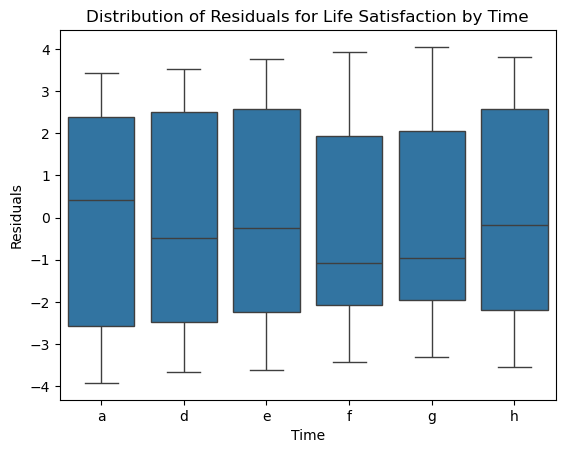

In [31]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_results.model.groups, y = mlm_results.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

### Adjusted models

In [32]:
mlm_results2 = smf.mixedlm("lifesatisfaction ~ Nat_Prop \
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + employed + ownhome + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [33]:
mlm_results2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.8246          
Min. group size:  3730    Log-Likelihood:     -46830.5238     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
---------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept       0.966     0.187    5.161  0.000   0.599   1.333
Nat_Prop        1.734     0.358    4.849  0.000   1.033   2.435
age2534         0.095     0.054    1.756  0.079  -0.011   0.201
age3544         0.128     0.054    2.362  0.018   0.022   0.234
age4554         0.227     0.053    4.242  0.000   0.122   0.332
age5564         0.399     0.055    7.275  0.000   0.292   0.507
age65           0.829     0.058   14.224  0.000   0.715   0.944
male           -0.047     0.027   -1.734  0.083  -0.099   0.006
partner         0.174     0.032    5.520  0.000   0.112   0.236
Race_WhiteOth  -0.147     0.055   -2.676  0.007  -0.254  -0.039
Race_Mixed     -0.135     0.066   -2.044  0.041  -0.265  -0.006
Race_Black     -0.511     0.052   -9.894  0.000  -0.612  -0.409
Race_SthAsian  -0.246     0.038   -6.489  0.000  -0.321  -0.172
Race_OthAsian  -0.191     0.078   -2.436  0.015  -0.345  -0.037
Race_Other     -0.105     0.118   -0.886  0.376  -0.336   0.127
employed        0.175     0.030    5.888  0.000   0.117   0.233
ownhome         0.213     0.031    6.811  0.000   0.152   0.274
income_q2       1.445     0.048   30.059  0.000   1.350   1.539
income_q3       1.330     0.050   26.358  0.000   1.231   1.429
income_q4       1.596     0.049   32.605  0.000   1.500   1.691
income_q5       1.645     0.050   33.043  0.000   1.548   1.743
vulnerable     -0.464     0.033  -13.912  0.000  -0.530  -0.399
healthcond      0.808     0.033   24.375  0.000   0.743   0.873
IMD_Rank        0.000     0.000    4.870  0.000   0.000   0.000
Time Var        0.194                                          
==============================================================

"""

In [34]:
print(mlm_results2.random_effects)

{'a': Time   -0.020777
dtype: float64, 'd': Time   -0.057217
dtype: float64, 'e': Time    0.007752
dtype: float64, 'f': Time   -0.108845
dtype: float64, 'g': Time   -0.268321
dtype: float64, 'h': Time    0.447408
dtype: float64}


In [35]:
mlm_results3 = smf.mixedlm("lifesatisfaction ~ garden \
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + employed + ownhome + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

In [36]:
mlm_results3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.4826          
Min. group size:  3730    Log-Likelihood:     -45785.9248     
Max. group size:  3730    Converged:          No              
Mean group size:  3730.0                                      
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        0.469     0.179   2.619  0.009   0.118   0.820
garden           1.405     0.030  47.129  0.000   1.347   1.464
age2534          0.137     0.052   2.664  0.008   0.036   0.238
age3544          0.066     0.052   1.278  0.201  -0.035   0.167
age4554          0.120     0.051   2.353  0.019   0.020   0.220
age5564          0.278     0.052   5.311  0.000   0.176   0.381
age65            0.672     0.056  12.056  0.000   0.563   0.781
male            -0.005     0.026  -0.196  0.845  -0.055   0.045
partner          0.131     0.030   4.342  0.000   0.072   0.190
Race_WhiteOth   -0.048     0.052  -0.915  0.360  -0.150   0.055
Race_Mixed      -0.071     0.063  -1.124  0.261  -0.195   0.053
Race_Black      -0.272     0.049  -5.508  0.000  -0.369  -0.175
Race_SthAsian   -0.138     0.036  -3.811  0.000  -0.210  -0.067
Race_OthAsian   -0.094     0.075  -1.257  0.209  -0.241   0.053
Race_Other      -0.022     0.113  -0.191  0.849  -0.242   0.199
employed         0.197     0.028   6.955  0.000   0.141   0.252
ownhome          0.015     0.030   0.487  0.626  -0.044   0.074
income_q2        1.318     0.046  28.684  0.000   1.228   1.408
income_q3        1.191     0.048  24.693  0.000   1.097   1.286
income_q4        1.428     0.047  30.489  0.000   1.336   1.520
income_q5        1.478     0.048  31.027  0.000   1.385   1.572
vulnerable      -0.219     0.032  -6.800  0.000  -0.283  -0.156
healthcond       0.209     0.034   6.126  0.000   0.142   0.276
IMD_Rank         0.000     0.000   3.350  0.001   0.000   0.000
Time Var         0.177                                         
==============================================================

"""

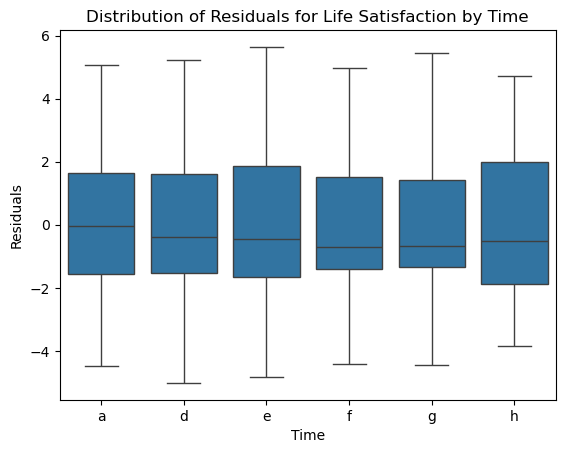

In [37]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_results2.model.groups, y = mlm_results2.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

### Adjusted + Location

In [38]:
mlm_results3 = smf.mixedlm("lifesatisfaction ~ Nat_Prop \
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + employed + ownhome + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank \
+ City_Bham + City_Blackpool + City_Bradford + City_Bristol + City_Cambridge \
+ City_Derby + City_Leeds + City_Leicester + City_Lincoln + City_Liverpool \
+ City_Manchester + City_MiltonKeynes + City_Newcastle + City_Nottingham \
+ City_Plymouth + City_Sheffield + City_Southampton + City_Stoke + City_York", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

In [39]:
mlm_results3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.8078          
Min. group size:  3730    Log-Likelihood:     -46799.4469     
Max. group size:  3730    Converged:          No              
Mean group size:  3730.0                                      
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           0.850    0.188   4.520 0.000  0.482  1.219
Nat_Prop            1.696    0.361   4.703 0.000  0.989  2.402
age2534             0.080    0.054   1.471 0.141 -0.026  0.186
age3544             0.125    0.054   2.312 0.021  0.019  0.232
age4554             0.240    0.053   4.478 0.000  0.135  0.344
age5564             0.391    0.055   7.114 0.000  0.284  0.499
age65               0.824    0.058  14.120 0.000  0.710  0.938
male               -0.045    0.027  -1.685 0.092 -0.098  0.007
partner             0.164    0.032   5.172 0.000  0.102  0.226
Race_WhiteOth      -0.086    0.056  -1.532 0.125 -0.195  0.024
Race_Mixed         -0.089    0.067  -1.335 0.182 -0.221  0.042
Race_Black         -0.432    0.053  -8.077 0.000 -0.537 -0.327
Race_SthAsian      -0.214    0.040  -5.367 0.000 -0.292 -0.136
Race_OthAsian      -0.117    0.079  -1.471 0.141 -0.272  0.039
Race_Other         -0.014    0.119  -0.119 0.905 -0.247  0.219
employed            0.174    0.030   5.860 0.000  0.116  0.232
ownhome             0.196    0.031   6.250 0.000  0.134  0.257
income_q2           1.427    0.048  29.734 0.000  1.333  1.521
income_q3           1.311    0.050  25.993 0.000  1.212  1.410
income_q4           1.586    0.049  32.462 0.000  1.491  1.682
income_q5           1.658    0.050  33.264 0.000  1.560  1.755
vulnerable         -0.462    0.033 -13.836 0.000 -0.527 -0.397
healthcond          0.803    0.033  24.146 0.000  0.738  0.868
IMD_Rank            0.000    0.000   5.545 0.000  0.000  0.000
City_Bham           0.198    0.055   3.593 0.000  0.090  0.306
City_Blackpool      0.368    0.140   2.624 0.009  0.093  0.642
City_Bradford       0.368    0.067   5.473 0.000  0.236  0.500
City_Bristol        0.039    0.071   0.547 0.584 -0.100  0.177
City_Cambridge      0.531    0.152   3.483 0.000  0.232  0.829
City_Derby          0.010    0.109   0.090 0.928 -0.204  0.224
City_Leeds          0.173    0.061   2.817 0.005  0.053  0.293
City_Leicester      0.174    0.099   1.748 0.080 -0.021  0.368
City_Lincoln        0.141    0.181   0.780 0.435 -0.213  0.495
City_Liverpool     -0.020    0.114  -0.177 0.859 -0.244  0.204
City_Manchester     0.247    0.076   3.234 0.001  0.097  0.396
City_MiltonKeynes   0.336    0.081   4.138 0.000  0.177  0.495
City_Newcastle      0.334    0.104   3.218 0.001  0.131  0.538
City_Nottingham     0.230    0.095   2.421 0.015  0.044  0.417
City_Plymouth       0.224    0.095   2.356 0.018  0.038  0.411
City_Sheffield     -0.010    0.059  -0.176 0.861 -0.127  0.106
City_Southampton    0.485    0.111   4.358 0.000  0.267  0.703
City_Stoke         -0.218    0.122  -1.794 0.073 -0.457  0.020
City_York           0.411    0.107   3.850 0.000  0.202  0.620
Time Var            0.193                                     
==============================================================

"""

In [40]:
print(mlm_results3.random_effects)

{'a': Time   -0.019978
dtype: float64, 'd': Time   -0.054446
dtype: float64, 'e': Time    0.007575
dtype: float64, 'f': Time   -0.109133
dtype: float64, 'g': Time   -0.268805
dtype: float64, 'h': Time    0.444788
dtype: float64}


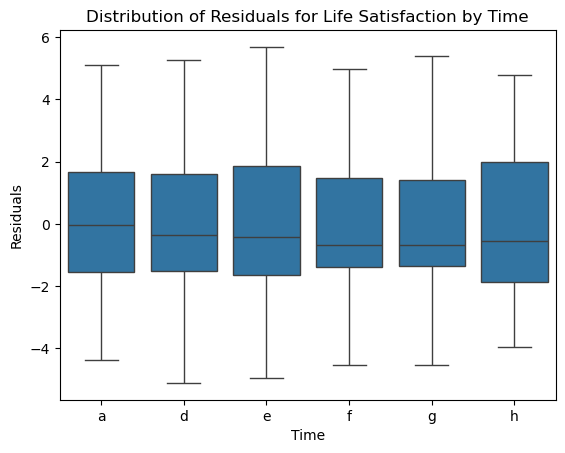

In [41]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_results3.model.groups, y = mlm_results3.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

### Parks and LS

In [42]:
mlm_park_results = smf.mixedlm("lifesatisfaction ~ Park_Prop", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [43]:
mlm_park_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              4.7278          
Min. group size:  3730    Log-Likelihood:     -49155.5426     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
----------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept    2.290      0.201   11.380   0.000    1.896    2.685
Park_Prop   -0.346      0.148   -2.332   0.020   -0.636   -0.055
Time Var     0.242                                              
==============================================================

"""

In [44]:
print(mlm_park_results.random_effects)

{'a': Time    0.316747
dtype: float64, 'd': Time    0.22447
dtype: float64, 'e': Time   -0.001689
dtype: float64, 'f': Time   -0.174509
dtype: float64, 'g': Time   -0.298256
dtype: float64, 'h': Time   -0.066763
dtype: float64}


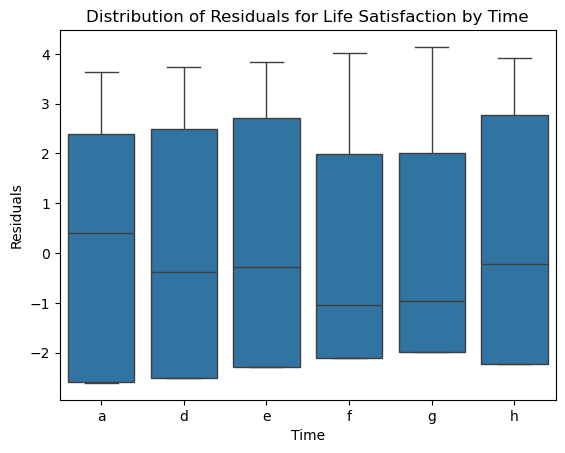

In [45]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_park_results.model.groups, y = mlm_park_results.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

In [46]:
mlm_park_results2 = smf.mixedlm("lifesatisfaction ~ Park_Prop \
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + employed + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank \
+ City_Bham + City_Blackpool + City_Bradford + City_Bristol + City_Cambridge \
+ City_Derby + City_Leeds + City_Leicester + City_Lincoln + City_Liverpool \
+ City_Manchester + City_MiltonKeynes + City_Newcastle + City_Nottingham \
+ City_Plymouth + City_Sheffield + City_Southampton + City_Stoke + City_York", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [47]:
mlm_park_results2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.8176          
Min. group size:  3730    Log-Likelihood:     -46826.9410     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           0.955    0.188   5.081 0.000  0.587  1.323
Park_Prop          -0.262    0.135  -1.937 0.053 -0.528  0.003
age2534             0.068    0.054   1.250 0.211 -0.038  0.174
age3544             0.131    0.054   2.407 0.016  0.024  0.237
age4554             0.253    0.054   4.724 0.000  0.148  0.358
age5564             0.409    0.055   7.429 0.000  0.301  0.517
age65               0.860    0.058  14.744 0.000  0.745  0.974
male               -0.040    0.027  -1.502 0.133 -0.093  0.012
partner             0.182    0.032   5.788 0.000  0.121  0.244
Race_WhiteOth      -0.104    0.056  -1.862 0.063 -0.213  0.005
Race_Mixed         -0.098    0.067  -1.460 0.144 -0.229  0.034
Race_Black         -0.430    0.053  -8.053 0.000 -0.535 -0.326
Race_SthAsian      -0.214    0.040  -5.375 0.000 -0.293 -0.136
Race_OthAsian      -0.106    0.079  -1.332 0.183 -0.261  0.050
Race_Other         -0.024    0.119  -0.200 0.842 -0.257  0.209
employed            0.196    0.030   6.633 0.000  0.138  0.254
income_q2           1.425    0.048  29.643 0.000  1.330  1.519
income_q3           1.311    0.051  25.952 0.000  1.212  1.410
income_q4           1.591    0.049  32.514 0.000  1.495  1.687
income_q5           1.671    0.050  33.514 0.000  1.573  1.769
vulnerable         -0.467    0.033 -13.981 0.000 -0.533 -0.402
healthcond          0.809    0.033  24.316 0.000  0.744  0.874
IMD_Rank            0.000    0.000   6.623 0.000  0.000  0.000
City_Bham           0.214    0.055   3.885 0.000  0.106  0.321
City_Blackpool      0.366    0.140   2.609 0.009  0.091  0.641
City_Bradford       0.405    0.067   6.029 0.000  0.274  0.537
City_Bristol        0.044    0.071   0.627 0.531 -0.094  0.183
City_Cambridge      0.540    0.153   3.541 0.000  0.241  0.839
City_Derby          0.038    0.109   0.345 0.730 -0.177  0.252
City_Leeds          0.162    0.061   2.641 0.008  0.042  0.283
City_Leicester      0.169    0.099   1.696 0.090 -0.026  0.364
City_Lincoln        0.213    0.180   1.179 0.239 -0.141  0.566
City_Liverpool     -0.024    0.115  -0.209 0.835 -0.248  0.201
City_Manchester     0.237    0.077   3.093 0.002  0.087  0.387
City_MiltonKeynes   0.344    0.081   4.231 0.000  0.184  0.503
City_Newcastle      0.358    0.104   3.440 0.001  0.154  0.561
City_Nottingham     0.240    0.095   2.524 0.012  0.054  0.427
City_Plymouth       0.232    0.095   2.430 0.015  0.045  0.418
City_Sheffield      0.005    0.059   0.085 0.932 -0.111  0.121
City_Southampton    0.507    0.112   4.542 0.000  0.288  0.726
City_Stoke         -0.184    0.122  -1.506 0.132 -0.423  0.055
City_York           0.416    0.107   3.893 0.000  0.206  0.625
Time Var            0.194                                     
==============================================================

"""

In [48]:
print(mlm_park_results2.random_effects)

{'a': Time   -0.027477
dtype: float64, 'd': Time   -0.050572
dtype: float64, 'e': Time    0.010532
dtype: float64, 'f': Time   -0.104242
dtype: float64, 'g': Time   -0.273574
dtype: float64, 'h': Time    0.445333
dtype: float64}


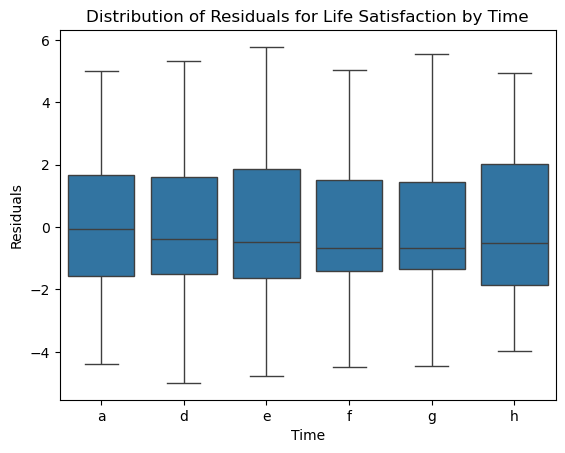

In [49]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_park_results2.model.groups, y = mlm_park_results2.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

### Sports and LS 

In [50]:
mlm_sport_results = smf.mixedlm("lifesatisfaction ~ Sports_Pro", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [51]:
mlm_sport_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              4.7288          
Min. group size:  3730    Log-Likelihood:     -49157.5966     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept    2.271      0.201   11.283   0.000    1.877    2.666
Sports_Pro   0.171      0.200    0.858   0.391   -0.220    0.563
Time Var     0.242                                              
==============================================================

"""

In [52]:
print(mlm_sport_results.random_effects)

{'a': Time    0.316747
dtype: float64, 'd': Time    0.22447
dtype: float64, 'e': Time   -0.001689
dtype: float64, 'f': Time   -0.174509
dtype: float64, 'g': Time   -0.298256
dtype: float64, 'h': Time   -0.066763
dtype: float64}


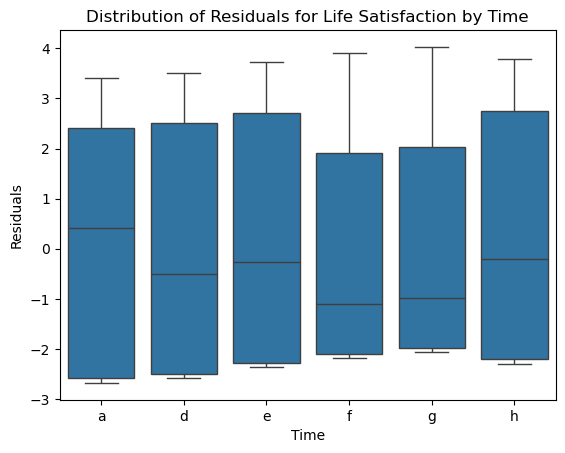

In [53]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_sport_results.model.groups, y = mlm_sport_results.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

In [54]:
mlm_sport_results2 = smf.mixedlm("lifesatisfaction ~ Sports_Pro \
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + employed + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank \
+ City_Bham + City_Blackpool + City_Bradford + City_Bristol + City_Cambridge \
+ City_Derby + City_Leeds + City_Leicester + City_Lincoln + City_Liverpool \
+ City_Manchester + City_MiltonKeynes + City_Newcastle + City_Nottingham \
+ City_Plymouth + City_Sheffield + City_Southampton + City_Stoke + City_York", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

In [55]:
mlm_sport_results2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.8182          
Min. group size:  3730    Log-Likelihood:     -46828.5174     
Max. group size:  3730    Converged:          No              
Mean group size:  3730.0                                      
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           0.943    0.188   5.017 0.000  0.574  1.311
Sports_Pro         -0.006    0.183  -0.034 0.973 -0.364  0.352
age2534             0.066    0.054   1.219 0.223 -0.040  0.172
age3544             0.127    0.054   2.340 0.019  0.021  0.234
age4554             0.251    0.054   4.688 0.000  0.146  0.356
age5564             0.405    0.055   7.350 0.000  0.297  0.512
age65               0.854    0.058  14.665 0.000  0.740  0.968
male               -0.039    0.027  -1.455 0.146 -0.092  0.014
partner             0.184    0.032   5.841 0.000  0.122  0.246
Race_WhiteOth      -0.104    0.056  -1.871 0.061 -0.214  0.005
Race_Mixed         -0.099    0.067  -1.472 0.141 -0.230  0.033
Race_Black         -0.427    0.053  -7.995 0.000 -0.532 -0.323
Race_SthAsian      -0.215    0.040  -5.402 0.000 -0.294 -0.137
Race_OthAsian      -0.101    0.079  -1.279 0.201 -0.257  0.054
Race_Other         -0.025    0.119  -0.209 0.835 -0.258  0.208
employed            0.196    0.030   6.628 0.000  0.138  0.254
income_q2           1.424    0.048  29.623 0.000  1.330  1.518
income_q3           1.311    0.051  25.948 0.000  1.212  1.410
income_q4           1.591    0.049  32.510 0.000  1.495  1.687
income_q5           1.672    0.050  33.539 0.000  1.574  1.770
vulnerable         -0.466    0.033 -13.941 0.000 -0.531 -0.400
healthcond          0.809    0.033  24.321 0.000  0.744  0.875
IMD_Rank            0.000    0.000   6.676 0.000  0.000  0.000
City_Bham           0.211    0.055   3.840 0.000  0.103  0.319
City_Blackpool      0.379    0.140   2.700 0.007  0.104  0.654
City_Bradford       0.415    0.067   6.187 0.000  0.283  0.546
City_Bristol        0.045    0.071   0.642 0.521 -0.093  0.184
City_Cambridge      0.545    0.153   3.568 0.000  0.246  0.844
City_Derby          0.044    0.109   0.400 0.689 -0.171  0.258
City_Leeds          0.170    0.061   2.762 0.006  0.049  0.290
City_Leicester      0.173    0.100   1.742 0.081 -0.022  0.368
City_Lincoln        0.214    0.180   1.185 0.236 -0.140  0.568
City_Liverpool     -0.015    0.115  -0.127 0.899 -0.239  0.210
City_Manchester     0.244    0.076   3.198 0.001  0.095  0.394
City_MiltonKeynes   0.343    0.081   4.228 0.000  0.184  0.503
City_Newcastle      0.355    0.104   3.418 0.001  0.152  0.559
City_Nottingham     0.244    0.095   2.565 0.010  0.058  0.431
City_Plymouth       0.240    0.095   2.517 0.012  0.053  0.426
City_Sheffield      0.007    0.059   0.119 0.906 -0.109  0.123
City_Southampton    0.494    0.111   4.429 0.000  0.275  0.712
City_Stoke         -0.196    0.122  -1.607 0.108 -0.435  0.043
City_York           0.419    0.107   3.921 0.000  0.210  0.629
Time Var            0.194                                     
==============================================================

"""

In [56]:
print(mlm_sport_results2.random_effects)

{'a': Time   -0.02754
dtype: float64, 'd': Time   -0.050461
dtype: float64, 'e': Time    0.010498
dtype: float64, 'f': Time   -0.104275
dtype: float64, 'g': Time   -0.27359
dtype: float64, 'h': Time    0.445369
dtype: float64}


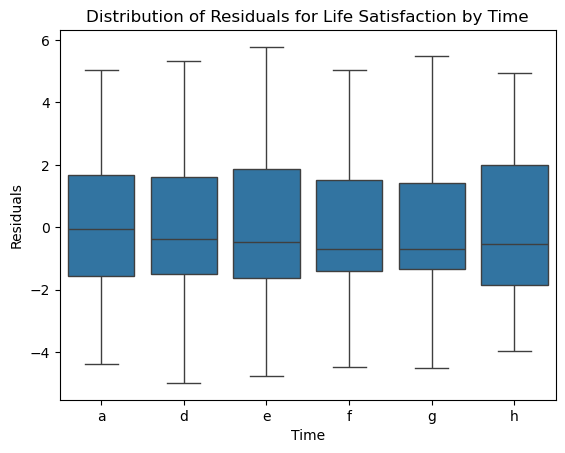

In [57]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_sport_results2.model.groups, y = mlm_sport_results2.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

### Total GS and LS

In [58]:
mlm_total_results = smf.mixedlm("lifesatisfaction ~ Total_Prop", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [59]:
mlm_total_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              4.7289          
Min. group size:  3730    Log-Likelihood:     -49158.6916     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        2.286     0.202  11.303  0.000   1.889   2.682
Total_Prop      -0.038     0.088  -0.428  0.669  -0.210   0.135
Time Var         0.242                                         
==============================================================

"""

In [60]:
print(mlm_total_results.random_effects)

{'a': Time    0.316747
dtype: float64, 'd': Time    0.22447
dtype: float64, 'e': Time   -0.001689
dtype: float64, 'f': Time   -0.174509
dtype: float64, 'g': Time   -0.298256
dtype: float64, 'h': Time   -0.066763
dtype: float64}


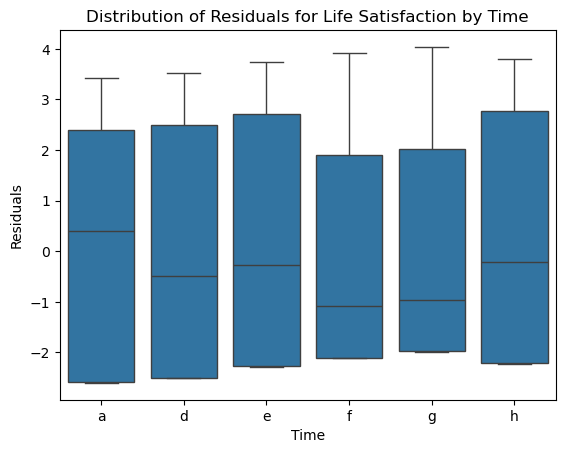

In [61]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_total_results.model.groups, y = mlm_total_results.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

In [62]:
mlm_total_results2 = smf.mixedlm("lifesatisfaction ~ Total_Prop \
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + employed + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank \
+ City_Bham + City_Blackpool + City_Bradford + City_Bristol + City_Cambridge \
+ City_Derby + City_Leeds + City_Leicester + City_Lincoln + City_Liverpool \
+ City_Manchester + City_MiltonKeynes + City_Newcastle + City_Nottingham \
+ City_Plymouth + City_Sheffield + City_Southampton + City_Stoke + City_York", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

In [63]:
mlm_total_results2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.8178          
Min. group size:  3730    Log-Likelihood:     -46828.2271     
Max. group size:  3730    Converged:          No              
Mean group size:  3730.0                                      
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           0.972    0.189   5.144 0.000  0.601  1.342
Total_Prop         -0.120    0.081  -1.484 0.138 -0.280  0.039
age2534             0.067    0.054   1.242 0.214 -0.039  0.173
age3544             0.129    0.054   2.367 0.018  0.022  0.235
age4554             0.253    0.054   4.718 0.000  0.148  0.358
age5564             0.407    0.055   7.388 0.000  0.299  0.515
age65               0.857    0.058  14.712 0.000  0.743  0.972
male               -0.040    0.027  -1.489 0.137 -0.093  0.013
partner             0.184    0.032   5.843 0.000  0.122  0.246
Race_WhiteOth      -0.104    0.056  -1.872 0.061 -0.214  0.005
Race_Mixed         -0.099    0.067  -1.475 0.140 -0.230  0.032
Race_Black         -0.429    0.053  -8.030 0.000 -0.534 -0.324
Race_SthAsian      -0.217    0.040  -5.435 0.000 -0.295 -0.139
Race_OthAsian      -0.103    0.079  -1.294 0.196 -0.258  0.053
Race_Other         -0.027    0.119  -0.224 0.823 -0.260  0.206
employed            0.196    0.030   6.635 0.000  0.138  0.254
income_q2           1.424    0.048  29.631 0.000  1.330  1.518
income_q3           1.311    0.051  25.954 0.000  1.212  1.410
income_q4           1.591    0.049  32.509 0.000  1.495  1.687
income_q5           1.670    0.050  33.478 0.000  1.572  1.768
vulnerable         -0.466    0.033 -13.954 0.000 -0.532 -0.401
healthcond          0.810    0.033  24.330 0.000  0.744  0.875
IMD_Rank            0.000    0.000   6.540 0.000  0.000  0.000
City_Bham           0.210    0.055   3.818 0.000  0.102  0.318
City_Blackpool      0.372    0.140   2.652 0.008  0.097  0.647
City_Bradford       0.419    0.067   6.240 0.000  0.287  0.550
City_Bristol        0.044    0.071   0.619 0.536 -0.095  0.182
City_Cambridge      0.540    0.153   3.541 0.000  0.241  0.839
City_Derby          0.051    0.109   0.463 0.644 -0.164  0.265
City_Leeds          0.172    0.061   2.806 0.005  0.052  0.293
City_Leicester      0.171    0.099   1.725 0.085 -0.023  0.366
City_Lincoln        0.224    0.180   1.243 0.214 -0.129  0.578
City_Liverpool     -0.014    0.114  -0.118 0.906 -0.238  0.211
City_Manchester     0.246    0.076   3.218 0.001  0.096  0.396
City_MiltonKeynes   0.355    0.082   4.354 0.000  0.195  0.515
City_Newcastle      0.370    0.104   3.545 0.000  0.165  0.575
City_Nottingham     0.249    0.095   2.619 0.009  0.063  0.436
City_Plymouth       0.244    0.095   2.561 0.010  0.057  0.431
City_Sheffield      0.014    0.060   0.239 0.811 -0.103  0.131
City_Southampton    0.501    0.112   4.490 0.000  0.282  0.719
City_Stoke         -0.186    0.122  -1.520 0.128 -0.425  0.054
City_York           0.418    0.107   3.914 0.000  0.209  0.627
Time Var            0.194                                     
==============================================================

"""

In [64]:
print(mlm_total_results2.random_effects)

{'a': Time   -0.027411
dtype: float64, 'd': Time   -0.050452
dtype: float64, 'e': Time    0.010546
dtype: float64, 'f': Time   -0.104245
dtype: float64, 'g': Time   -0.273612
dtype: float64, 'h': Time    0.445174
dtype: float64}


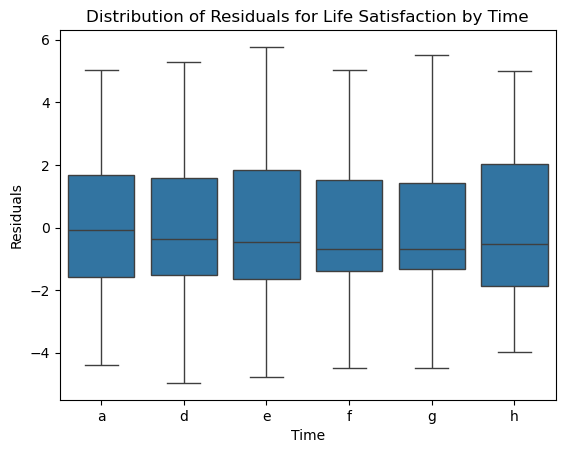

In [65]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_total_results2.model.groups, y = mlm_total_results2.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

### Gardens and LS

In [66]:
mlm_garden_results = smf.mixedlm("lifesatisfaction ~ garden", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [67]:
mlm_garden_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.9627          
Min. group size:  3730    Log-Likelihood:     -47181.7630     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept    1.127      0.185    6.105   0.000    0.765    1.489
garden       1.816      0.028   65.783   0.000    1.762    1.870
Time Var     0.202                                              
==============================================================

"""

In [68]:
print(mlm_garden_results.random_effects)

{'a': Time    0.31674
dtype: float64, 'd': Time    0.224465
dtype: float64, 'e': Time   -0.001689
dtype: float64, 'f': Time   -0.174505
dtype: float64, 'g': Time   -0.298249
dtype: float64, 'h': Time   -0.066762
dtype: float64}


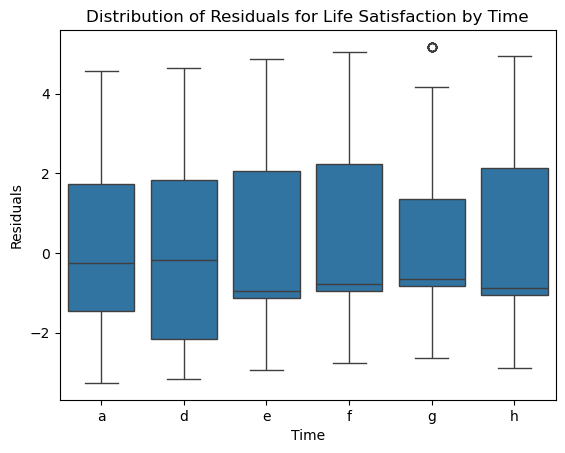

In [69]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_garden_results.model.groups, y = mlm_garden_results.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()

In [70]:
mlm_garden_results2 = smf.mixedlm("lifesatisfaction ~ garden\
+ age2534 + age3544 + age4554 + age5564 + age65 \
+ male + partner + Race_WhiteOth + Race_Mixed + Race_Black + Race_SthAsian \
+ Race_OthAsian + Race_Other + ownhome + employed + income_q2 + income_q3 + income_q4 + income_q5\
+ vulnerable + healthcond + IMD_Rank \
+ City_Bham + City_Blackpool + City_Bradford + City_Bristol + City_Cambridge \
+ City_Derby + City_Leeds + City_Leicester + City_Lincoln + City_Liverpool \
+ City_Manchester + City_MiltonKeynes + City_Newcastle + City_Nottingham \
+ City_Plymouth + City_Sheffield + City_Southampton + City_Stoke + City_York", US, groups= "Time").fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [71]:
mlm_garden_results2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: lifesatisfaction
No. Observations: 22380   Method:             REML            
No. Groups:       6       Scale:              3.4768          
Min. group size:  3730    Log-Likelihood:     -45786.2712     
Max. group size:  3730    Converged:          Yes             
Mean group size:  3730.0                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.456    0.180  2.531 0.011  0.103  0.809
garden               1.394    0.030 46.376 0.000  1.335  1.452
age2534              0.124    0.052  2.401 0.016  0.023  0.225
age3544              0.066    0.052  1.267 0.205 -0.036  0.167
age4554              0.123    0.051  2.405 0.016  0.023  0.223
age5564              0.265    0.053  5.034 0.000  0.162  0.368
age65                0.666    0.056 11.911 0.000  0.556  0.775
male                -0.006    0.026 -0.246 0.806 -0.057  0.044
partner              0.131    0.030  4.323 0.000  0.071  0.190
Race_WhiteOth       -0.028    0.053 -0.532 0.594 -0.133  0.076
Race_Mixed          -0.056    0.064 -0.882 0.378 -0.182  0.069
Race_Black          -0.251    0.051 -4.919 0.000 -0.352 -0.151
Race_SthAsian       -0.130    0.038 -3.421 0.001 -0.205 -0.056
Race_OthAsian       -0.065    0.076 -0.863 0.388 -0.214  0.083
Race_Other           0.008    0.113  0.069 0.945 -0.214  0.230
ownhome              0.008    0.030  0.271 0.787 -0.051  0.067
employed             0.195    0.028  6.873 0.000  0.139  0.251
income_q2            1.310    0.046 28.519 0.000  1.220  1.400
income_q3            1.184    0.048 24.511 0.000  1.089  1.278
income_q4            1.423    0.047 30.388 0.000  1.331  1.515
income_q5            1.485    0.048 31.093 0.000  1.392  1.579
vulnerable          -0.220    0.032 -6.810 0.000 -0.283 -0.157
healthcond           0.211    0.034  6.162 0.000  0.144  0.278
IMD_Rank             0.000    0.000  2.918 0.004  0.000  0.000
City_Bham            0.037    0.053  0.700 0.484 -0.066  0.140
City_Blackpool       0.178    0.134  1.330 0.184 -0.084  0.441
City_Bradford        0.184    0.064  2.865 0.004  0.058  0.310
City_Bristol        -0.100    0.068 -1.474 0.140 -0.232  0.033
City_Cambridge       0.341    0.146  2.341 0.019  0.055  0.626
City_Derby          -0.042    0.104 -0.404 0.686 -0.247  0.162
City_Leeds           0.080    0.059  1.357 0.175 -0.035  0.194
City_Leicester       0.036    0.095  0.376 0.707 -0.150  0.222
City_Lincoln         0.302    0.172  1.757 0.079 -0.035  0.640
City_Liverpool      -0.117    0.109 -1.067 0.286 -0.331  0.097
City_Manchester      0.074    0.073  1.016 0.309 -0.069  0.217
City_MiltonKeynes    0.184    0.078  2.371 0.018  0.032  0.336
City_Newcastle       0.148    0.099  1.492 0.136 -0.046  0.343
City_Nottingham     -0.020    0.091 -0.217 0.828 -0.198  0.159
City_Plymouth        0.224    0.091  2.466 0.014  0.046  0.402
City_Sheffield      -0.081    0.057 -1.430 0.153 -0.192  0.030
City_Southampton     0.278    0.106  2.616 0.009  0.070  0.487
City_Stoke          -0.222    0.116 -1.905 0.057 -0.450  0.006
City_York            0.259    0.102  2.539 0.011  0.059  0.459
Time Var             0.177                                    
==============================================================

"""

In [72]:
print(mlm_garden_results2.random_effects)

{'a': Time    0.006411
dtype: float64, 'd': Time   -0.025141
dtype: float64, 'e': Time    0.01224
dtype: float64, 'f': Time   -0.108456
dtype: float64, 'g': Time   -0.277388
dtype: float64, 'h': Time    0.392334
dtype: float64}


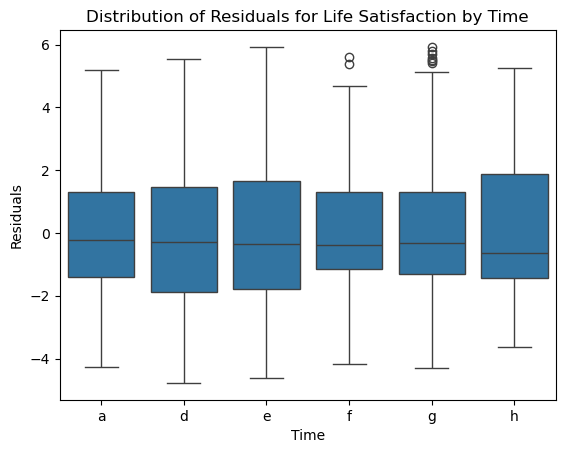

In [73]:
fig = plt.figure()

ax = sns.boxplot(x = mlm_garden_results2.model.groups, y = mlm_garden_results2.resid)

ax.set_title("Distribution of Residuals for Life Satisfaction by Time")
ax.set_ylabel("Residuals")
ax.set_xlabel("Time")
plt.show()